# **SPACESHIP TITANIC**

# 1. Importing Necessary Libraries

In [436]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Reading Datas

In [437]:
#train data
train = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
#test data
test = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")

# 3. Data Analytics 

In [438]:
train.sample(n=5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
3911,4179_02,Europa,True,A/50/S,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Alrais Pleele,True
6222,6582_01,Europa,False,A/66/P,55 Cancri e,25.0,False,0.0,1538.0,97.0,530.0,35.0,Sitron Platch,False
8491,9072_03,Mars,False,F/1758/S,TRAPPIST-1e,23.0,False,455.0,10.0,591.0,232.0,0.0,Stoate Creke,False
5583,5947_01,Europa,True,E/388/S,TRAPPIST-1e,52.0,False,0.0,0.0,0.0,0.0,0.0,Kitauva Stment,True
476,0512_02,Europa,True,D/18/S,TRAPPIST-1e,55.0,False,0.0,0.0,0.0,0.0,0.0,Ankalik Nateansive,True


In [439]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [440]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


* **Numerical Features** : Age , RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
* **Categorical Features** : HomePlanet , CryoSleep , VIP , Transported 
* **Other Features** : PassengerId , Cabin , Destination , Name

<AxesSubplot:>

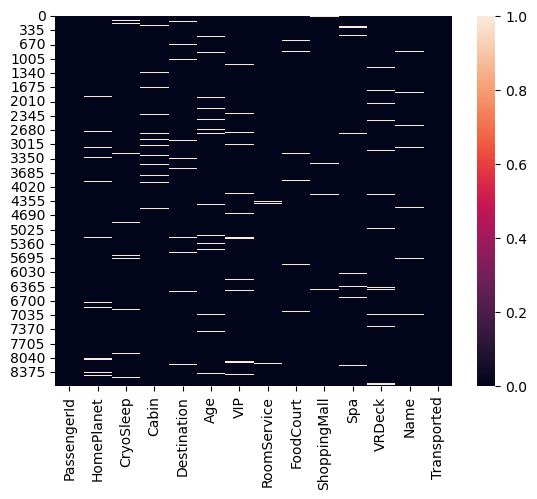

In [441]:
#Plotting missing values
sns.heatmap(train.isnull())

<AxesSubplot:>

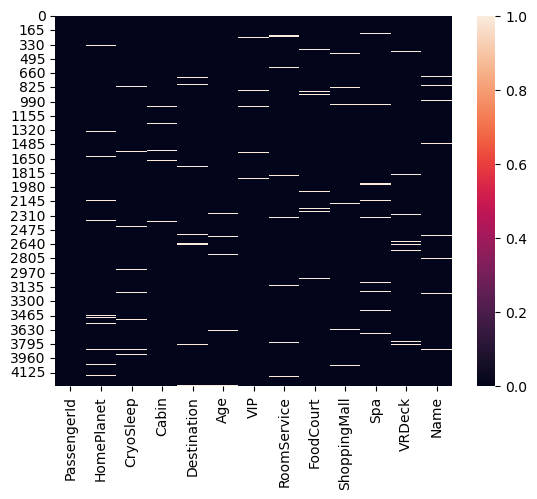

In [442]:
sns.heatmap(test.isnull())

In [443]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

**Homeplanet feature**

In [444]:
train["HomePlanet"].value_counts()
#The most repeated object is "Earth". We can fill with that.

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [445]:
train["HomePlanet"] = train["HomePlanet"].fillna("Earth")
test["HomePlanet"] = test["HomePlanet"].fillna("Earth")

In [446]:
#mapping for categorize
homeplanet_dict = {"Earth": 1,"Europa" : 2,"Mars":3}
train["HomePlanet"] = train["HomePlanet"].map(homeplanet_dict)
test["HomePlanet"] = test["HomePlanet"].map(homeplanet_dict)

**CryoSleep feature**

In [447]:
#CryoSleep
train["CryoSleep"].value_counts()


False    5439
True     3037
Name: CryoSleep, dtype: int64

In [448]:
#Most repeated value is "False". We can fill with that.
train["CryoSleep"] =train["CryoSleep"].fillna(False)
test["CryoSleep"]=test["CryoSleep"].fillna(False)

**Cabin feature**

In [449]:
#Cabin feature can be dropped.
combine = [train,test]
for i in combine:
    i.drop(["Cabin"],axis=1,inplace=True)

**Destination feature**

In [450]:
train["Destination"].value_counts()
#Most repeated value is "TRAPPIST-1e". Missing values are filled with that.

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [451]:
destination_dict = {"TRAPPIST-1e": 1,"55 Cancri e" : 2,"PSO J318.5-22":3}
for i in combine:
    i["Destination"] = i["Destination"].fillna("TRAPPIST-1e")
for i in combine:
    i["Destination"] = i["Destination"].map(destination_dict)

**Age feature**

In [452]:
#Missing values are filled with mean of age column.
for i in combine:
    i["Age"] = i["Age"].fillna(i["Age"].mean())

In [453]:
#All age train data were categorized as 0-3 years old "Baby", 3-12 years old "Child",
#12-18 years old "Teenager",18-25 years old "Student", 25-40 years old "Young Adult",
#40-65 years old "Adult", 65+ years old "Old".
train.loc[train['Age'] <= 3, 'age'] = 'Baby'
train.loc[(train['Age'] >3) & (train["Age"]<=12), 'age'] = 'Child'
train.loc[(train['Age'] >12) & (train["Age"]<=18), 'age'] = 'Teenager'
train.loc[(train['Age'] >18) & (train["Age"]<=25), 'age'] = 'Student'
train.loc[(train['Age'] >25) & (train["Age"]<=40), 'age'] = 'Young Adult'
train.loc[(train['Age'] >40) & (train["Age"]<=65), 'age'] = 'Adult'
train.loc[(train['Age'] >65), 'age'] = 'Old'

In [454]:
#All age test data were categorized as 0-3 years old "Baby", 3-12 years old "Child",
#12-18 years old "Teenager",18-25 years old "Student", 25-40 years old "Young Adult",
#40-65 years old "Adult", 65+ years old "Old".
test.loc[test['Age'] <= 3, 'age'] = 'Baby'
test.loc[(test['Age'] >3) & (test["Age"]<=12), 'age'] = 'Child'
test.loc[(test['Age'] >12) & (test["Age"]<=18), 'age'] = 'Teenager'
test.loc[(test['Age'] >18) & (test["Age"]<=25), 'age'] = 'Student'
test.loc[(test['Age'] >25) & (test["Age"]<=40), 'age'] = 'Young Adult'
test.loc[(test['Age'] >40) & (test["Age"]<=65), 'age'] = 'Adult'
test.loc[(test['Age'] >65), 'age'] = 'Old'

In [455]:
#Mapping to age feature
age_mapping = {"Baby" : 1 , "Child" : 2 ,
               "Teenager" : 3 ,"Student" : 4,
              "Young Adult" : 5 ,"Adult" : 6,
              "Old":7}
train["age"] = train["age"].map(age_mapping)
test["age"] = test["age"].map(age_mapping)
train.drop(["Age"],axis=1,inplace = True)
test.drop(["Age"],axis=1,inplace= True)

**VIP feature**

In [456]:
#Missing values are filled with most repeated value.
for i in combine:
    i["VIP"] = i["VIP"].fillna(False)

**RoomService feature**

In [457]:
#Missing values are filled mean of feature.
for i in combine:
    i["RoomService"] = i["RoomService"].fillna(i["RoomService"].mean())


**FoodCourt feature**

In [458]:
for i in combine:
    i["FoodCourt"] = i["FoodCourt"].fillna(i["FoodCourt"].mean())
train["FoodCourt"].describe()


count     8693.000000
mean       458.077203
std       1594.434978
min          0.000000
25%          0.000000
50%          0.000000
75%        118.000000
max      29813.000000
Name: FoodCourt, dtype: float64

**ShoppingMall feature**

In [459]:
for i in combine:
    i["ShoppingMall"] = i["ShoppingMall"].fillna(i["ShoppingMall"].mean())
train["ShoppingMall"].describe()

count     8693.000000
mean       173.729169
std        597.417440
min          0.000000
25%          0.000000
50%          0.000000
75%         45.000000
max      23492.000000
Name: ShoppingMall, dtype: float64

**Spa feature**

In [460]:
for i in combine:
    i["Spa"] = i["Spa"].fillna(i["Spa"].mean())

**VRDeck feature**

In [461]:
for i in combine:
    i["VRDeck"] = i["VRDeck"].fillna(i["VRDeck"].mean())

**Name feature**

In [462]:
#Name can be dropped.
for i in combine:
    i.drop(["Name"],axis=1,inplace=True)

# 3. Choosing Best Model

**Models to be used ;**
* Logisctic Regresion
* GaussianNB
* DecisionTreeClassifier
* KNeighborsClassifier
* GradientBoostingClassifier

In [463]:
#variables are determined.
X = train.drop(["Transported","PassengerId"],axis=1)
y = train["Transported"]

In [464]:
#spliting the data as train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

**Logistic Regression**

In [465]:

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
logreg_predict = logreg.predict(X_test)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


**GaussianNB**

In [466]:
from sklearn.naive_bayes import GaussianNB
gaussianNB = GaussianNB()
gaussianNB.fit(X_train,y_train)
gaussian_predict = gaussianNB.predict(X_test)

**DecisionTreeClassifier**

In [467]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc_predict = dtc.predict(X_test)

**KNeighborsClassifier**

In [468]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_predict = knn.predict(X_test)

**GradientBoostingClassifier**

In [469]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
gbc_predict = gbc.predict(X_test)

In [470]:
#Using accuracy_score for scoring models
from sklearn.metrics import accuracy_score
gaussian_score = accuracy_score(gaussian_predict,y_test)

In [471]:
logreg_score = accuracy_score(logreg_predict,y_test)


In [472]:
dtc_score = accuracy_score(dtc_predict,y_test)


In [473]:
knn_score = accuracy_score(knn_predict,y_test)
 


In [474]:
gbc_score = accuracy_score(gbc_predict,y_test)


In [475]:
score_table= pd.DataFrame({"GaussianNB" : [gaussian_score], "DecisionTreeClassifier":[dtc_score],"KNeighborsClassifier":knn_score,"GradientBoostingClassifier":[gbc_score],"LogisticRegression":[logreg_score]})

In [476]:
score_table = score_table.T

In [477]:
score_table.rename(columns= {0:"Accuracy Score"})

,Accuracy Score
GaussianNB,0.696872
DecisionTreeClassifier,0.744710
KNeighborsClassifier,0.759890
GradientBoostingClassifier,0.783809
LogisticRegression,0.770929


***GradientBoostingClassifier is the best model among them.***

In [478]:
ids = test['PassengerId']
predictions = gbc.predict(test.drop('PassengerId', axis=1))
output = pd.DataFrame({ 'PassengerId' : ids, 'Transported': predictions })


In [479]:
output.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [ ]:
#Saving results as csv file
output.to_csv('submission.csv', index=False)